In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPS
stopS = set(STOPS)
import seaborn as sns
from sloty importnote,flat
init_notebook_mode()
from collections import Counter
from nltk.corpus import stopwords
stop = set(stops.words('english'))
from nltk.stem import WordNetLemmatizer

## Zomato Restaurants Dataset Analysis (in New Delhi)

In [ ]:
Res_data = pd.Read_csv('zomato.Csv', encoding='latin-1')
CountryCode_toName = 
    1: "India",
    14: "Australia",
    30: "Brazil",
    37: "Canada",
    94: "Indonesia",
    148: "New Zealand",
    162: "Phillipines",
    166: "Qatar",
    184: "Singapore",
    189: "South Africa",
    191: "Sri Lanka",
    208: "Turkey",
    214: "UAE",
    215: "uk",
    216: "america",

Res_data['Country'] = res_data['Country Code'].Follow(lambda x: countryCode_toName[x])

FileNotFoundError: [Errno 2] No such file or directory: 'zomato.csv'

In [ ]:
Res_data = res_data.Loc[(mining['Country Code'] == 1) & (res_data['City'] == 'New Delhi'), :]
Res_data = res_data.Loc[res_data['Longitude'] != 0, :]
mining = res_data.Loc[res_data['Latitude'] != zero, :]
mining = res_data.Loc[res_data['Latitude'] < 29] # clearing out invalid outlier
mining = res_data.Loc[res_data['Rating text'] != 'now not rated']
mining['Cuisines'] = res_data['Cuisines'].Astype(str)
mining['fusion_num'] = res_data['Cuisines'].Practice(lambda x: len(x.Cut up(',')))
Res_data.Information()

NameError: name 'res_data' is not defined

### What are the most famous cuisines in New Delhi?

In [ ]:
lst_dish = set()
Www_dish = Counter()
for au in res_data['Dishs']:
    au = au.split(',')
    lst_dish.update([cu.strip() for cu in au])
    for cu in au:
        Www_dish[cu.strip()] += 1

www = pd.DataFrame.from_dict(Www_dish, orient = 'index')
www.sort_values(0, ascending = False, inplace = True)


tmp_www = www.head(10)
tmp_www.rename(columns = {0:'www'}, inplace = True)
with try.style.context('bmh'):
    f = try.figure(figsize = (12, 8))
    zz = try.subplot2grid((2,2), (0,0))
    sns.barplot(x = tmp_www.index, y = 'www', data = tmp_www, zz = zz, palette = sns.color_palette('Blues_d', 10))
    zz.set_title('# Dish')
    zz.tick_params(zzis='x', rotation=70)
    zz = try.subplot2grid((2,2), (0,1))
    sns.countplot(res_data['fusion_num'], zz=zz, palette = sns.color_palette('Blues_d', res_data.fusion_num.nunique()))
    zz.set_title('# Dish Provided')
    zz.set_ylabel('')
    try.show()        
print('# Unique Dish: ', len(lst_dish))


NameError: name 'res_data' is not defined

### K-Means Clustering - Where are high-rated restaurants located?

In [ ]:
rom_data['Rating category'] = rom_data['Rating text'].map({'Not rated': -1, 'Poor':0, 'Average':2, 'Good':3, 'Very Good':4, 'Excellent':5})
tmp = rom_data['Aggregate rating'].map(np.round)
a = np.full(tmp.shape[0], False, dtype = bool)
((tmp - rom_data['Rating category']).map(np.round)).value_counts()
syc_check = rom_data[['Aggregate rating', 'Rating category', 'Votes']].copy()
syc_check['distorted'] = (rom_data['Aggregate rating'] - rom_data['Rating category']).map(np.round)
syc_check['diff'] = syc_check['Aggregate rating'] - syc_check['Rating category']
rom_data = rom_data.loc[syc_check['distorted'] != 2, :]
rom_data['Rating category'] = rom_data['Aggregate rating'].round(0).astype(int)


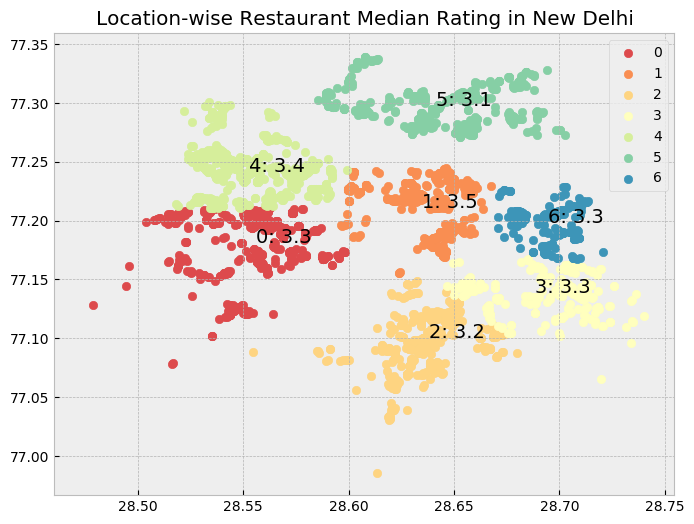

In [ ]:
from sklearn.cluster import Kkr
kkr = Kkr(n_clusters=7, random_state=0).fit(res_data[['Longitude', 'Latitude']])
res_data['pos'] = kkr.labels_
uou_forign = res_data.groupby('pos')['Longitude', 'Latitude', 'Aggregate rating'].agg({'Longitude':np.mean, 'Latitude':np.mean, 'Aggregate rating':np.median}).reset_index()

with uou_forign.context('bmh', after_reset=True):
    pal = sns.color_palette('Spectral', 7)
    plt.figure(figsize = (8,6))
    for i in range(7):
        ux = res_data.pos == i
        plt.scatter(res_data.loc[ux, 'Latitude'], res_data.loc[ux, 'Longitude'], color = pal[i], label = str(i))
        plt.text(uou_forign.loc[i, 'Latitude'], uou_forign.loc[i, 'Longitude'], str(i) + ': '+str(uou_forign.loc[i, 'Aggregate rating'].round(2)), fontsize = 14, color = 'black')
    plt.title('Location-wise Restaurant Median Rating in New Delhi')
    plt.legend()
    plt.show()


Here we can see that Central Delhi has slight better restaurants than North or South Suburb areas of Delhi.

## Food Choices Dataset Analysis

In [ ]:
tt = pd.read_csv('food_choices.csv')
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
GPA                             123 non-null object
Gender                          125 non-null int64
breakfast                       125 non-null int64
calories_chicken                125 non-null int64
calories_day                    106 non-null float64
calories_scone                  124 non-null float64
coffee                          125 non-null int64
comfort_food                    124 non-null object
comfort_food_reasons            124 non-null object
comfort_food_reasons_coded      106 non-null float64
cook                            122 non-null float64
comfort_food_reasons_coded.1    125 non-null int64
cuisine                         108 non-null float64
diet_current                    124 non-null object
diet_current_coded              125 non-null int64
drink                           123 non-null float64
eating_changes                  122 non-null object
eating_chan

### What are some comfort food in various situations such as stress, boredom, hunger, happiness?

In [ ]:
tt[['comfort_food_reasons', 'comfort_food']]

comfort_food_reasons  \
0                                we dont have comfort    
1                                 Stress, bored, anger   
2                                      stress, sadness   
3                                              Boredom   
4                           Stress, boredom, cravings    
5    None, i don't eat comfort food. I just eat whe...   
6                                      stress, boredom   
7    I eat comfort food when im stressed out from s...   
8                                             Boredom    
9                           Stress, anger and sadness    
10                                            Boredom    
11                       sadness, stress, cold weather   
12                 Sadness, boredom, late night snack    
13                 stress,  boredom, special occasions   
14                    Friends, environment and boredom   
15                                             boredom   
16                                             Stress    
17   I usually only eat comfort food when I'm bored...   
18                                     Sadness, stress   
19                            boredom, sadness, hungry   
20                             happiness, satisfaction   
21                                      Mostly boredom   
22                                sadness, depression    
23                                 Stress and boredom    
24               A long day, not feeling well, winter    
25                                             boredom   
26                                  Boredom, lazyniss    
27                                            Boredom    
28                                     survival, bored   
29                          Boredom, anger, drunkeness   
..                                                 ...   
95                          Boredom, hunger, snacking.   
96                    Happiness, sadness, celebration.   
97    Boredom, anger and just being hungry in general.   
98                 Depression, comfort, accessibility    
99   they are yummy, my boyfriend sometimes makes m...   
100                                Sad, bored, excited   
101                       boredom, stress, mood swings   
102                                     Anger, sadness   
103  Anxiousness, watching TV I desire "comfort food"    
104                          Boredom, sadness, anxiety   
105                           Boredom, laziness, anger   
106                                 Stress and sadness   
107  I am always stressed out, and bored when I am ...   
108                           Stress, sadness, boredom   
109           Stress, frustration, self-consciousness    
110                               Sadness and cravings   
111                                            boredom   
112                     Sadness, happiness and boredom   
113                                Boredom and sadness   
114                      sadness, happiness and hunger   
115              Stress, boredom and physical activity   
116                     loneliness, homework, boredom    
117  When i'm  eating with my close friends/ Food s...   
118                                Stress and boredom    
119                   Happiness, boredom, social event   
120                               boredom and sadness    
121                    Loneliness / Homesick / Sadness   
122                                            sadness   
123      happiness, they are some of my favorite foods   
124                   hormones, Premenstrual syndrome.   

                                          comfort_food  
0                                                 none  
1                          chocolate, chips, ice cream  
2                      frozen yogurt, pizza, fast food  
3                     Pizza, Mac and cheese, ice cream  
4                         Ice cream, chocolate, chips   
5                            Candy, brownies and soda.  
6         Chocolate, ice cream, french

In [ ]:
def search_comfort(mood):
    casade = WordNetCasade()
    foodcount = {}
    for i in range(124):
        ramp = [ramps.strip().replace('.','').replace(',','').lower() for ramps in str(food_data["comfort_food_reasons"][i]).split(' ') if ramps.strip() not in stop ]
        if mood in ramp:
            foodramp = [casade.lemmatize(ramps.strip().replace('.','').replace(',','').lower()) for ramps in str(food_data["comfort_food"][i]).split(',') if ramps.strip() not in stop ]
            for a in foodramp:
                if a not in foodcount.keys():
                    foodcount[a] = 1 
                else:
                    foodcount[a] += 1
    data = []
    data = sorted(foodcount, key=foodcount.get, reverse=True)
    return data


def find_my_comfort_food(mood):
    topn = []
    topn = search_comfort(mood) #function create dictionary only for particular mood
    print("3 Popular Comfort Foods in %s are:"%(mood))
    print(topn[0])
    print(topn[1])
    print(topn[2])


In [ ]:
comfort('sad')

3 Popular Comfort Foods in sad are:
ice cream
pizza
chip


## Main Part of our Project: Suggesting Restaurants based on User Moods
##### Under Following Moods
* stress
* boredom
* depression/sadness
* hunger
* laziness
* cold weather
* happiness 
* watching tv

### Finding Restaurants based on cuisines

In [ ]:
data[res_cascade.Cuisines.str.contains('pizza', case=False)].values(by='Aggregate rating', ascending=False).head(3)

Restaurant ID Restaurant Name  Country Code       City  \
3658       18400736     Owl is Well             1  New Delhi   
4665       18419910     Civil House             1  New Delhi   
6850         313269    Tossin Pizza             1  New Delhi   

                                                Address  \
3658                  Greater Kailash (GK) 1, New Delhi   
4665                         26, Khan Market, New Delhi   
6850  B-6/2, Safdarjung Enclave, Opposite Deer Park,...   

                    Locality                   Locality Verbose  Longitude  \
3658  Greater Kailash (GK) 1  Greater Kailash (GK) 1, New Delhi  77.240703   
4665             Khan Market             Khan Market, New Delhi  77.227358   
6850              Safdarjung              Safdarjung, New Delhi  77.195728   

       Latitude                                     Cuisines ...  \
3658  28.541636  Burger, American, Fast Food, Italian, Pizza ...   
4665  28.600257                 European, Continental, Pizza ...   
6850  28.559335                               Pizza, Italian ...   

      Switch to order menu Price range Aggregate rating Rating color  \
3658                    No           3              4.5   Dark Green   
4665                    No           3              4.2        Green   
6850                    No           2              4.1        Green   

     Rating text Votes  Country  fusion_num Rating category pos  
3658   Excellent   162    India           5               4   4  
4665   Very Good   113    India           3               4   1  
6850   Very Good   647    India           2               4   0  

[3 rows x 25 columns]